---
## <span style="color:blue">PART 3: FEATURE ENGINEERING</span>
---
Feature Engineering will help us transform some of the raw data into meaningful features so that we can improve our analyis.

The northerwestern States are characterized by sub-zero degree Winter months, which leads to more people willing to sell their houses so that they can move to warmer regions in the south. There are also fewer potential buyers during the colder months. We will seek to find out if this trend of variation in house sales volume applies to King County. We will also seek to find out if the mean selling price of houses follows a similar trend.

We will do this by creating a column for the `month` when a sale was made and use it to analyze and visualize the seasonal variation in `sales volume` as well as the seasonal variation in the `mean price` of a house on sale. 

Research shows that the older a house is, the lower the price it fetches, but this price varies depending on the level of renovation. We will therefore analyze the relationship between `age of a house` and the `sale price` and create a new column for `age`, based on subtracting the `year a house was built` from the `year it was sold`.

In [28]:
import datetime

# Create a month column from date column
housing_data['month'] = housing_data['date'].dt.month_name()

**Creation of the House Age Column**

In [29]:
# Create year column from date column
housing_data['year'] = housing_data['date'].dt.year

# Create age column
housing_data['age'] = housing_data['year'] - housing_data['yr_built'] 

**Examining Whether There are Duplicates**

In [30]:
# Check for duplicate rows in housing_data
# Use keep='first' clause to avoid counting the first value in a set of repeated rows

housing_data.duplicated(keep='first').sum()

0

In [31]:
# Examine the new shape
housing_data.shape

(19163, 24)

## <span style="color:blue">PART 3: ANALYSIS OF VARIOUS FACTORS AFFECTING SALES PERFORMANCE</spam>
### <span style="color:blue">3.1 ANALYSIS OF SEASONAL VARIATION IN SALES PERFORMANCE</span>
The northerwestern States are characterized by sub-zero degree Winter months, which leads to more people willing to sell their houses so that they can move to warmer regions in the south. There are also fewer potential buyers during the colder months. 

We will seek to find out if this trend of variation in house sales volume applies to King County. We will also seek to find out if the mean selling price of houses follows a similar trend.

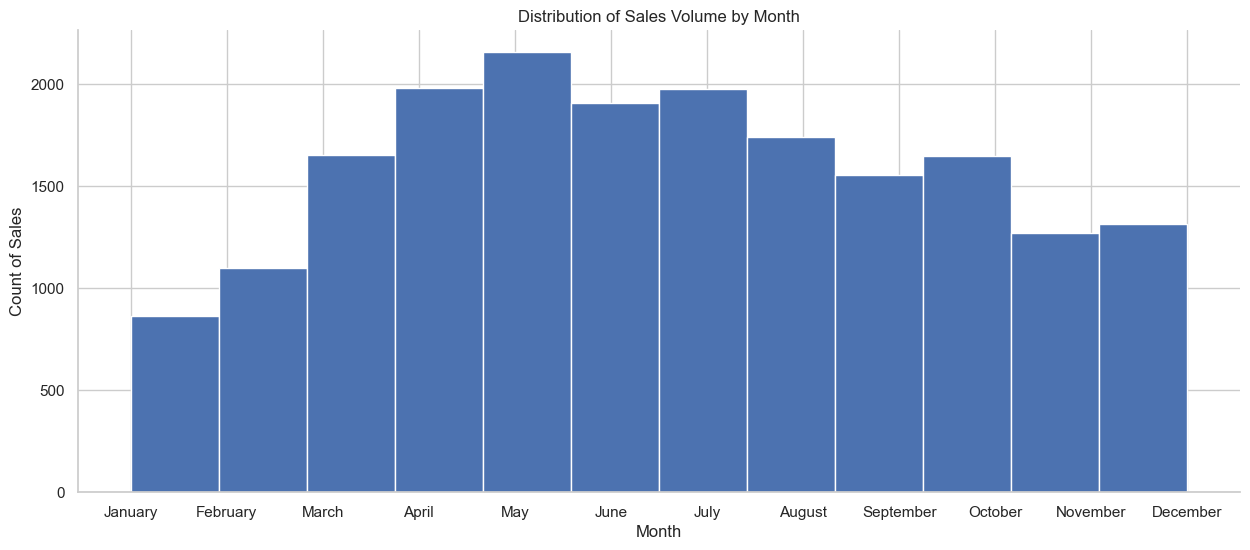

In [32]:
# Plot a distribution of sales volume by month
fig, ax = plt.subplots(figsize=(15, 6))

# Define the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

# Create a categorical column for month name
housing_data['month_ordered'] = pd.Categorical(housing_data['month'], categories=month_order, ordered=True)

# Plot the histogram
ax.hist(
    x=housing_data.sort_values('month_ordered')['month'],
    bins=12,
)

ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Count of Sales")
ax.set_title("Distribution of Sales Volume by Month");

# Drop the month_ordered column
housing_data.drop('month_ordered', axis=1, inplace=True)

#### <span style="color:blue">EXPLANATION OF THE DISTRIBUTION OF SALES BY MONTH</span>
We can observe that there is a variation in the volume of sales across the months in year.<br>
i. January and February starts off the year with low sales of around 1,000 houses per month.<br>
ii. The volume starts to rise in March, where it is about 1,500 houses.<br>
iii. From March to July, the volume is about 2,000 houses per month.<br>
iv. May has the highest volume at above 2,000 houses.<br>
v. From August, the volume starts to decline to around 1,700 houses in August and 1,500 in September.<br>
vi. There is a slight increase in October, but the price then drops through November and December.

This trend coincides with the seasons in the USA. Winter runs from December to Mid-March, and the Northewestern states being colder, people tend to move to warmer southern states or countries. 

Spring runs from mid-March to mid-June, while Summer runs from June to August. During this period, a significant number of people may move back to the northwestern states, thus raising the demand for houses. 

Finally, Fall, which runs from September to December, heralds the start of another cold season, at which people start moving out of the northwestern states.

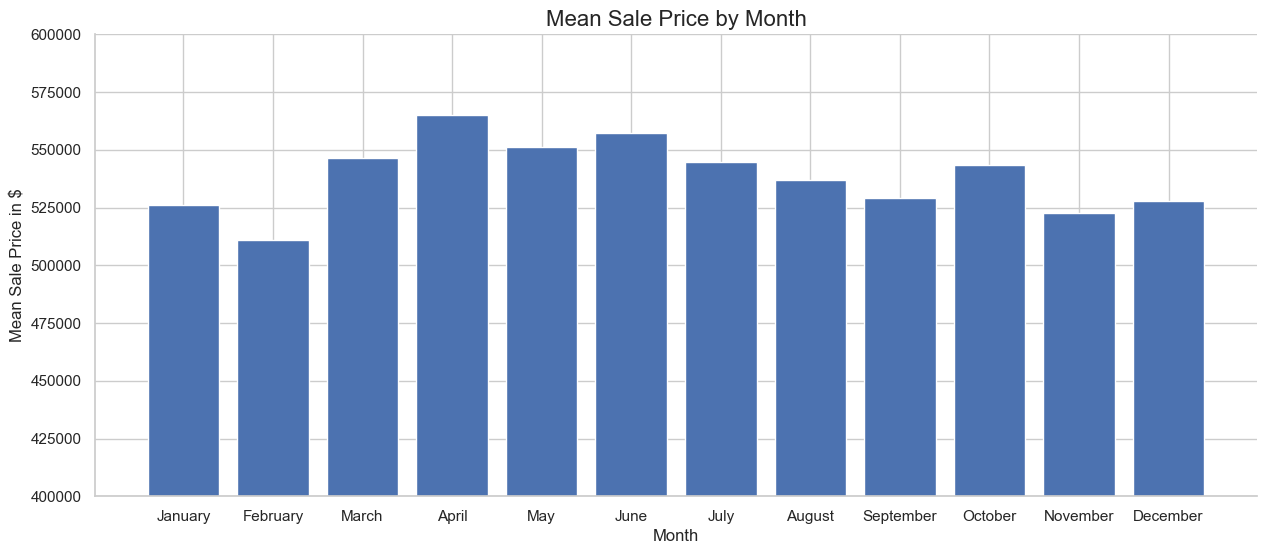

In [33]:
# A Bar Chart of Mean Sale Price by Month
fig, ax = plt.subplots(figsize=(15, 6))

# Define the correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

# Calculate the mean sale price
mean_price_per_month = housing_data.groupby('month')['price'].mean().reindex(month_order)

ax.bar(
    x = mean_price_per_month.index,
    height = mean_price_per_month.values,
    tick_label=mean_price_per_month.index
)

ax.set_ylim(400000, 600000)
ax.set_xlabel("Month", fontsize=12) 
ax.set_ylabel("Mean Sale Price in $", fontsize=12)
ax.set_title("Mean Sale Price by Month", fontsize = 16);

#### <span style="color:blue">EXPLANATION OF THE MEAN SALE PRICE DISTRIBUTION</span>
The distribution of mean sale price by month reveals conspicuous differences in the mean prices.<br>
i. The months of January and February have lower mean prices of between \\$500,000 and \\$525,000.<br>
ii. The mean price starts to rise in March and the mean price from March to August is around \\$550,000 or higher. April has the highest mean price of above \\$550,000.<br> 
iii. The mean price drops slightly in August and September, rises slightly in October, and then drops again in November and December. 

### <span style="color:blue">3.2 ANALYSIS OF THE RELATIONSHIP BETWEEN GRADE AND SALES PERFORMANCE</span>
Grade is a classification by construction quality which refers to the types of materials used and the quality of workmanship.
It is regulated by the [King County Local government](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r), and therefore, this is an important factor to anyone looking to buy a house.

We want to find out if the sales volume and mean prices vary by grade.

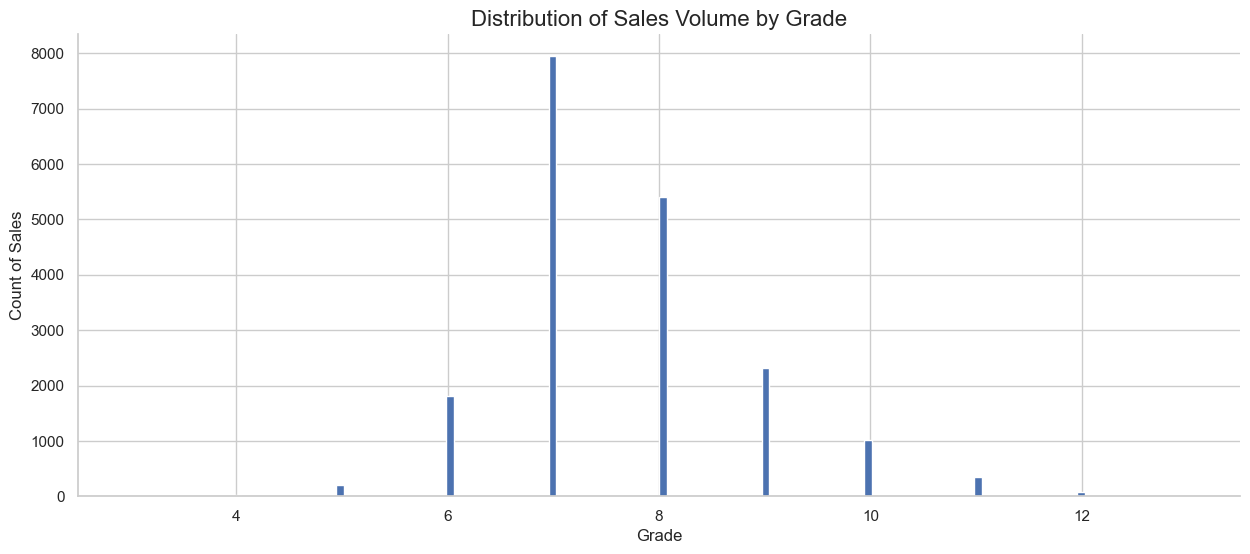

In [34]:
# Plot a distribution of sales volume by grade
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the histogram
ax.hist(
    x=housing_data['grade'],
    bins='auto',
)

ax.set_xlabel("Grade", fontsize=12)
ax.set_ylabel("Count of Sales")
ax.set_title("Distribution of Sales Volume by Grade", fontsize=16);

#### <span style="color:blue">EXPLANATION OF THE DISTRIBUTION OF HOUSE SALES VOLUME BY GRADE</span>
The plot of sales volume by grade appears to follow a normal distribution with grade 7 having the peak sales volume of about 8,000 houses.
The lower grades of 3, and 4, and the higher grades of 11 and 12 each have sales volumes around 100 or fewer.

To a homeowner or a seller, it makes sense to build or own a home that is in the median grades 7 and 8 because it is much more
likely to find a buyer.

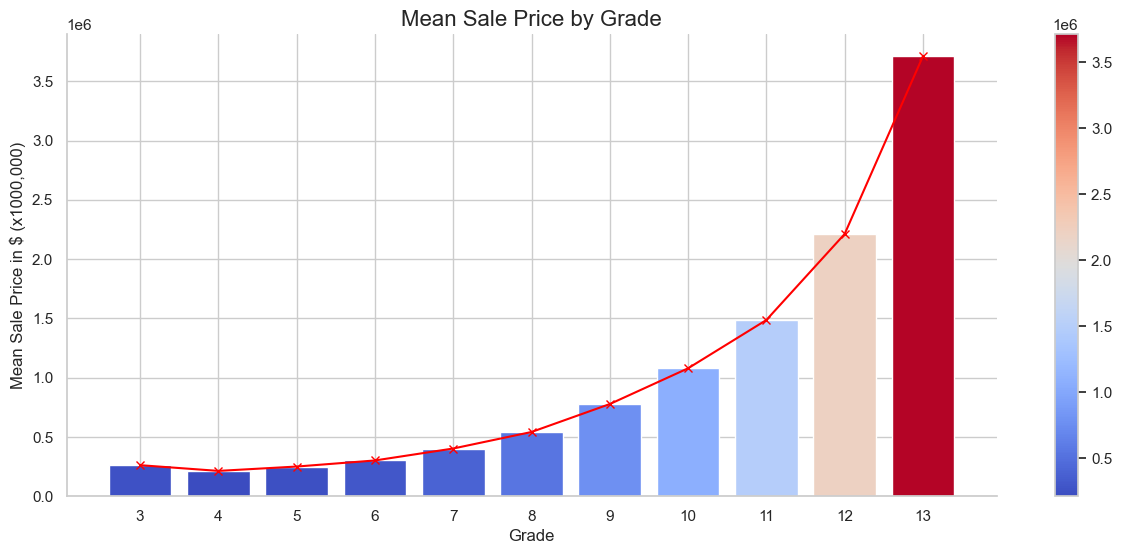

In [35]:
# A Bar Chart of Mean Sale Price by Grade
fig, ax = plt.subplots(figsize=(15, 6))

# Calculate the mean sale price
mean_price_per_grade = housing_data.groupby('grade')['price'].mean()

# Define a colormap and normalize the data
colormap = plt.get_cmap('coolwarm')
normalize = plt.Normalize(mean_price_per_grade.min(), mean_price_per_grade.max())

ax.bar(
    x = mean_price_per_grade.index,
    height = mean_price_per_grade.values,
    tick_label=mean_price_per_grade.index,
    color=colormap(normalize(mean_price_per_grade.values))
)

# Calculate the x-coordinates of the bar centers
x_centers = np.arange(3, 14)

# Plot a line graph along the top center points of the bars
plt.plot(x_centers, mean_price_per_grade.values, marker='x', 
         linestyle='-', color='red', label='Trendline')

# Add a color bar
sm = plt.cm.ScalarMappable(cmap=colormap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm)

ax.set_xlabel("Grade", fontsize=12)
ax.set_ylabel("Mean Sale Price in $ (x1000,000)", fontsize=12)
ax.set_title("Mean Sale Price by Grade", fontsize = 16);

#### <span style="color:blue">EXPLANATION OF THE DISTRIBUTION OF MEAN SALE PRICE BY GRADE</span>
Except for the grades 3 and 4 where the mean sale price drops slightly, the mean price is rising at an increasing rate as the grade of a house increases.

Between grade 3 and 8, the mean price is around \\$250,000 to \\$500,000. From grade 9 to 13, the mean sale price rises from around \\$600,000 to over \\$3,500,000.


### <span style="color:blue">3.3 ANALYSIS OF RELATIONSHIP BETWEEN BATHROOMS AND SALES PERFORMANCE</span>
Having dropped the record with 33 bedrooms, we will now visualize the relationship between number of bathrooms and sales volume or mean sale price.

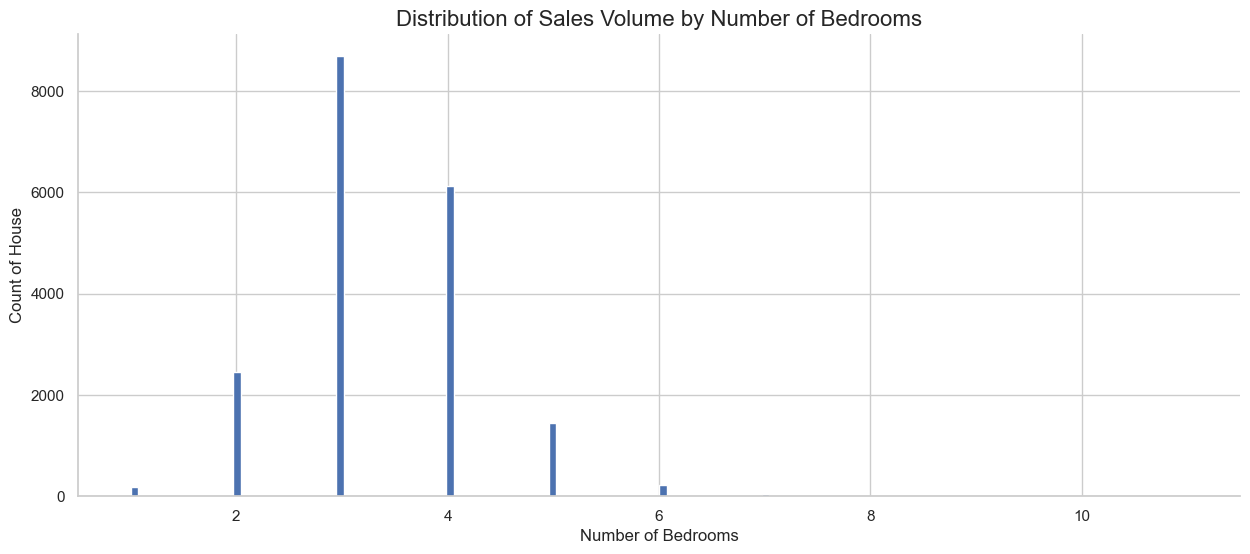

In [36]:
# Plot a distribution of sales volume by number of bedrooms
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the histogram
ax.hist(
    x=housing_data['bedrooms'],
    bins='auto',
)

ax.set_xlabel("Number of Bedrooms", fontsize=12)
ax.set_ylabel("Count of House")
ax.set_title("Distribution of Sales Volume by Number of Bedrooms", fontsize=16);

#### <span style="color:blue">EXPLANATION OF THE DISTRIBUTION OF SALES BY NUMBER OF BEDROOMS</span>
The distribution of sales volume by number of bedrooms approaches a normal distribution because it shows that the highest sales are for houses with 3 bedrooms, which is in the range of the measures of central tendency. The mean number of bedrooms is about 3.37, while the median is 3.0. 

The peak sales volume is above 8,000 for houses with 3 bedrooms, while for houses with less than 2 bedrooms or above 5 bedrooms, the sales volume is less than or equal to 2,000 houses.

This shows that, to a homeowner or a seller, it should be preferable to build or buy a home with 3 bedrooms because it is the one most likely to find a buyer.

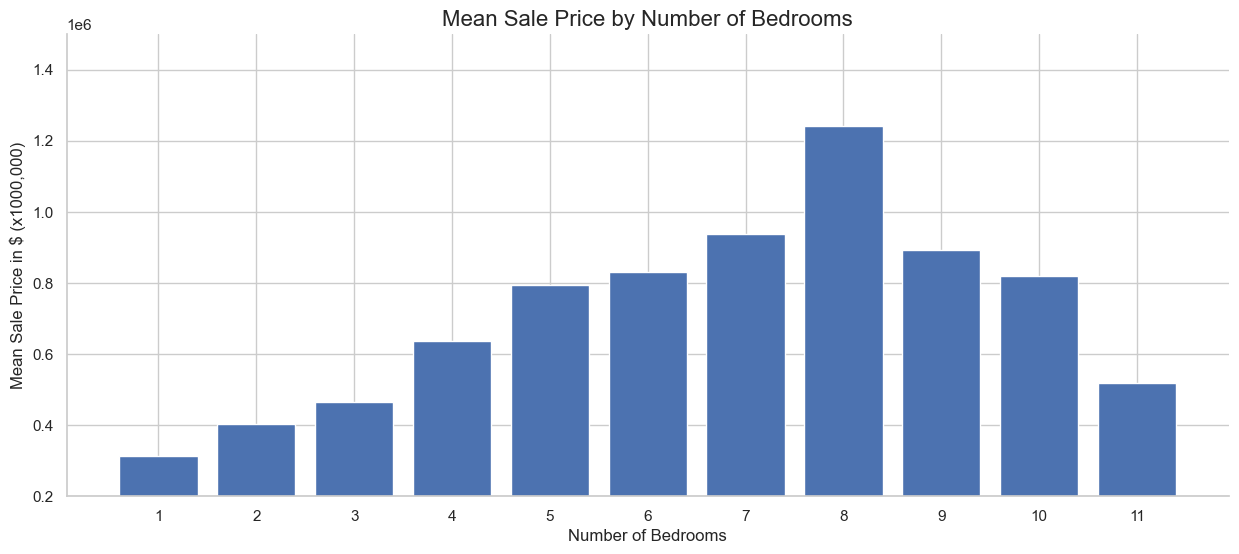

In [37]:
# A Bar Chart of Mean Sale Price by Number of Bedrooms
fig, ax = plt.subplots(figsize=(15, 6))

# Calculate the mean sale price
mean_price_per_month = housing_data.groupby('bedrooms')['price'].mean()

ax.bar(
    x = mean_price_per_month.index,
    height = mean_price_per_month.values,
    tick_label=mean_price_per_month.index
)

ax.set_ylim(200000, 1500000)
ax.set_xlabel("Number of Bedrooms", fontsize=12)
ax.set_ylabel("Mean Sale Price in $ (x1000,000)", fontsize=12)
ax.set_title("Mean Sale Price by Number of Bedrooms", fontsize = 16);

#### <span style="color:blue">EXPLANATION OF THE MEAN SALE PRICE DISTRIBUTION BY NUMBER OF BEDROOMS</span>
The distribution of mean sale price by number of bedrooms reveals conspicuous differences in the mean prices.<br>
i. Houses with 8 bedrooms have the highest mean price of above 1.2 million USD.<br> 
ii. Houses with between 4 and 10 bedrooms have a mean sale price of above \\$600,000.<br>
iii. Houses with 1, 2, 3, and 11 bedrooms have a mean sale price of less than \\$500,000

### <span style="color:blue">3.4 HYPOTHESIS TESTING</span>
In this section we will conduct hypothesis tests on whether the differences in mean sale prices between the different month, bedroom, and grade categories are statistically significant.

#### <span style="color:blue">3.4.1 HYPOTHESIS TESTING OF MEAN SALE PRICE IN EACH OF THE 12 MONTHS</span>
Information about variations in sale price is important to both a buyer and the seller. The buyer would like to know whether they're certain months when they can get the most significant bargain, while the seller would like to know in which months would their house fetch the highest price. 

We therefore, wish to find out if the observed differences in mean sale prices in the different months is statistically significant. 

The month is a categorical variable while the mean sale price is a numeric variable.

Since there are 12 categories for the month, the most appropriate test is the ANOVA since it will enable us to find out the statistical significance of the differences in mean price among the 12 months. 

**`HYPOTHESIS FORMULATION:`**

**`Null Hypothesis (H0)`** : The difference in mean sale price among the 12 months is not statistically significant.

**`Alternative Hypothesis (Ha)`** : The difference in mean sale price among the 12 months is statistically significant.

In [38]:
# ANOVA test for statistical significance of mean price between 
# the different months
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'price ~ C(month)'
lm = ols(formula, housing_data).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(month),11.0,3.981585e+12,3.619623e+11,2.633501,0.002308
Residual,19151.0,2.632215e+15,1.374453e+11,NaN,NaN


The calculated p-value is about 0.002308, which is less than the significance level of alpha=0.05. 
We therefore, reject the null hypothesis and state that this suggests that there are statistically significant differences in mean sale price of a house between at least some of the months in the year.

We would therefore, advise a buyer to consider buying a house in the offpeak months of January, February, September, October, November, or December, since this is the period they're likely to get a significant discount.

To a seller, we would advise them to consider selling in the peak months from March to August, since this is the period when the demand is high and they're also likely to sell at a significant margin compared to the offpeak months.

#### <span style="color:blue">3.4.2 HYPOTHESIS TESTING OF MEAN SALE PRICE FOR DIFFERENT HOUSE GRADES</span>

The mean sale price is noticeably increasing significantly as the grade of a house increases. 
However, given that our dataset has several other predictor variables, the difference in mean sale price could be influenced by other factors besides grade. 

To account for the potential confounding effects of the covariates, we will conduct an Analysis of Covariance (ANCOVA) test on the significance of the difference in mean sale price between different house grades.

**`HYPOTHESIS FORMULATION:`**<br>

**`Null Hypothesis (H0)`**: There is no significant difference in mean sale price among different house grades after controlling for covariates.<br>
**`Alternative Hypothesis (Ha)`**: There is a significant difference in mean sale price among different grades after controlling for covariates.

In [39]:
# Fit the ANCOVA model
formula = """price ~ C(grade) + bedrooms + bathrooms + sqft_living + sqft_lot + floors 
            + waterfront + view + condition + sqft_above + sqft_basement 
            + yr_built + yr_renovated + zipcode + lat + long + sqft_living15
            + sqft_lot15
          """
model = ols(formula, data=housing_data).fit()

# Perform ANCOVA analysis of variance
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANCOVA table
anova_table

,sum_sq,df,F,PR(>F)
C(grade),1.511591e+14,10.0,409.247720,0.000000e+00
bedrooms,4.917860e+12,1.0,133.145972,1.061496e-30
bathrooms,6.583467e+12,1.0,178.240575,1.781331e-40
sqft_living,1.495336e+12,1.0,40.484686,2.026580e-10
sqft_lot,2.465806e+11,1.0,6.675914,9.779780e-03
floors,2.035384e+12,1.0,55.105918,1.189893e-13
waterfront,3.675574e+13,1.0,995.123703,5.709172e-213
view,1.919828e+13,1.0,519.773512,1.539436e-113
condition,7.146631e+12,1.0,193.487654,9.000538e-44
sqft_above,7.116284e+10,1.0,1.926660,1.651405e-01


The calculated overall p-value is about 0.0, which is much less than a real estate significance level of alpha=0.05. 
We therefore, reject the null hypothesis and state that there is a significant difference in mean sale price among different house grades after controlling for covariates.

Therefore, if a buyer wants a low-budget house or around \\$500,000 or less, we would advise them to consider houses between grade 3 and 8. If they have the budget for a more expensive house above \\$500,000, we would advise them to go for between grade 9 and 13.

For a seller wishing to fetch the highest price in the market, they should go for grade 13 houses. If they want to sell low-priced houses quickly, then they should sell houses with between grades 3 and 8.

#### <span style="color:blue">3.4.3 HYPOTHESIS TESTING OF MEAN SALE PRICE FOR DIFFERENT NUMBERS OF BEDROOMS</span>

The mean sale price is noticeably varying significantly by the number of bedrooms. 
However, given that our dataset has several other predictor variables, the difference in mean sale price cannot be attributed to number of bedrooms alone. 

To account for the potential confounding effects of the covariates, we will conduct an Analysis of Covariance (ANCOVA) test on the significance of the difference in mean sale price between different numbers of bedrooms.

**`HYPOTHESIS FORMULATION:`**<br>

**`Null Hypothesis (H0)`**: There is no significant difference in mean sale price among different numbers of bedrooms after controlling for covariates.<br>
**`Alternative Hypothesis (Ha)`**: There is a significant difference in mean sale price among different numbers of bedrooms after controlling for covariates.

In [40]:
# Fit the ANCOVA model
formula = """price ~ C(bedrooms) + bathrooms + sqft_living + sqft_lot + floors 
            + waterfront + view + condition + grade + sqft_above + sqft_basement 
            + yr_built + yr_renovated + zipcode + lat + long + sqft_living15
            + sqft_lot15
          """
model = ols(formula, data=housing_data).fit()

# Perform ANCOVA analysis of variance
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANCOVA table
anova_table

,sum_sq,df,F,PR(>F)
C(bedrooms),2.097314e+13,10.0,51.462721,8.896260e-103
bathrooms,6.141548e+12,1.0,150.697897,1.645514e-34
sqft_living,1.549406e+12,1.0,38.018454,7.148298e-10
sqft_lot,2.006682e+11,1.0,4.923886,2.649956e-02
floors,1.930939e+11,1.0,4.738031,2.951501e-02
waterfront,3.797633e+13,1.0,931.842095,7.125691e-200
view,2.149866e+13,1.0,527.522148,3.519415e-115
condition,5.243293e+12,1.0,128.657017,1.003106e-29
grade,7.444257e+13,1.0,1826.630337,0.000000e+00
sqft_above,5.728227e+11,1.0,14.055605,1.780064e-04


The calculated overall p-value is about 8.896260e-103, which is much less than a real estate significance level of alpha=0.05. 
We therefore, reject the null hypothesis and state that there is a significant difference in mean sale price among different numbers of bedrooms after controlling for covariates.

The dataset shows the house with 11 bedrooms is only one and was built in 1918. Therefore, if a buyer wants a low-budget house, we would advise them to consider houses with between 1 and 4 bedrooms. If they have the budget for a more expensive house above \\$800,000, we would advise them to go for between 5 and 10 bedrooms.

For a seller wishing to fetch the highest price in the market, they should go for 8-bedroom houses. If they want to sell low-priced houses quickly, then they should sell houses with between 1 and 4 bedrooms.